# <span style="color:red">ESERCITAZIONE 5 </span>

## <span style="color:blue">ESERCIZIO 5.1</span>

### **APPLICAZIONE DELL'ALGORITMO DI METROPOLIS**

1. Calcolare $\left\langle r \right\rangle$ dell'atomo di idrogeno nel ground state $|n=1; l=0; m_l=0>$
2. Calcolare $\left\langle r \right\rangle$ dell'atomo di idrogeno nello stato $|n=2; l=1; m_l=0>$

Per un atomo idrogenoide le funzioni d'onda sono note con esattezza e, per gli stati che si intende studiare, sono le seguenti: $$ \Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} \quad \quad \Psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos\theta$$

In meccanica quantistica, $|\Psi|^2$ è la distribuzione di probabilità spaziale, quindi, se si riuscisse a campionarla, sarebbe immediato ottenere $\left\langle r \right\rangle$.

$|\Psi|^2$ è, però, molto più complicata di tutte le distribuzioni studiate finora: quasi certamente non è possibile trovare la funzione cumulativa (e di conseguenza invertirla), inoltre le tecniche classiche di accept/reject non sono molto efficaci ($|\Psi|^2$ è definita su un intervallo illimitato).

Si utilizza allora l'algoritmo di Metropolis: partendo da un punto arbitrario $x_0$ nel dominio di una distribuzione generica $p(x)$, si propone uno spostamento verso un'altra $x$. Questa mossa può essere accettata (dal nuovo punto si proporrà poi un nuovo spostamento), oppure rifiutata (si rimarrà nel punto originale che deve essere riconteggiato). Ripetendo questa procedura un numero di volte tendente ad infinito, le posizioni "percorse" sono distribuite secondo la $p(x)$.

Lo spostamento tra due punti è determinato dalla distribuzione $T(x|y)$. L'algoritmo si semplifica ulteriormente scegliendo una qualunque $T$ che soddisfi la proprietà di simmetria $T(x|y)=T(y|x)$. Infatti, in questo caso, la probabilità di accettare la mossa proposta è pari al minimo tra uno e il rapporto tra il valore della $p$ nel punto finale e in quello iniziale. Si genera, dunque, un numero casuale $\alpha$ uniformemente distribuito tra $[0;1]$. Se $\alpha<\min[1,\frac{p(x')}{p(x)}]<1$, la nuova configurazione viene accettata.

Si può apprezzare la potenza dell'algoritmo: è possibile campionare distribuzioni multidimensionali, illimitate (come in questo caso) e addirittura di cui non si conosce analiticamente il fattore di normalizzazione (nel rapporto infatti si elide). Inoltre, risulta essere piuttosto intuitivo: uno spostamento verso regioni più probabili viene sicuramente accettato; nel caso opposto, invece, la mossa può essere rifiutata, specialmente se conduce verso un punto molto meno probabile di quello di partenza. 

L'algoritmo ha due evidenti svantaggi: può impiegare molto tempo a convergere, specialmente se si parte da regioni estreme; inoltre i punti ottenuti sono ovviamente correlati. In questa esercitazione e in tutte le successive in cui verrà utilizzato il Metropolis, sarà dunque necessario tenere conto e gestire questi problemi.


Si è posto $a_0=1$, di conseguenza anche tutti i risultati (e le relative incertezze) saranno ottenuti in unità del raggio di Bohr. Per riconvertirli in metri è sufficiente moltiplicarli per $a_0=0,0529nm$. Si è scelto, inoltre, di esprimere le $|\psi|^2$ in coordinate cartesiane. Dopo aver calcolato il modulo quadro delle due funzioni d'onda, si sono effettuate le seguenti sostituzioni: $$r=\sqrt{x^2+y^2+z^2} \quad \quad \cos \theta=\frac{z}{\sqrt{x^2+y^2+z^2}}$$

In questo modo si è potuta scegliere, per ciascuna delle tre coordinate, una $T$ uniforme centrata nel punto di partenza e di larghezza $d$. Questa distribuzione è chiaramente simmetrica. In coordinate sferiche, invece, sarebbero sorti maggiori problemi in quanto $r$ è definito positivo; anche le coordinate angolari possono assumere valori solo in range prefissati. Sarebbe stato quindi molto più complicato trovare una $T$ simmetrica.

La larghezza $d$ della distribuzione uniforme è stata scelta, a seguito di diversi tentativi, in modo tale da soddisfare la regola empirica del $50\%$. Con questo rapporto tra mosse accettate e mosse proposte si ottiene un buon equilibrio tra la volontà di campionare punti il più possibile scorrelati e la necessità di adoperare un algoritmo efficiente. Per entrambi gli stati quantistici $d$ è risultata pari a diversi raggi di Bohr (più precisamente a $2,4a_0$ per 1s e $6a_0$ per 2p). 

Questi valori potrebbero inizialmente sorprendere: se ci si sposta dalla regione più probabile di così tanti $a_0$, si finisce, inevitabilmente, in regioni in cui $|\Psi|^2\simeq0$. Il tasso di mosse accettate dovrebbe essere quindi molto inferiore al 50%. Tuttavia bisogna ricordare che, a differenza del random walk, si può terminare in un qualunque punto tra $[x_0-\frac{d}{2}; x_0+\frac{d}{2}]$. Di conseguenza, nella maggior parte dei casi, ci si muove molto meno di $\frac{d}{2}$. È invece ragionevole che $d$ sia maggiore per lo stato 2p. All'aumentare di n, infatti, gli orbitali degli atomi idrogenoidi tendono ad essere sempre più delocalizzati rispetto al nucleo, dunque la loro $\Psi$ si mantiene piuttosto elevata in una regione più ampia.    

Anche in questa simulazione, si vuole graficare $\left\langle r \right\rangle$ in funzione del numero di step Monte Carlo. Per poter calcolare le incertezze sui risultati ottenuti si divide l'esperimento in blocchi. 

In questo caso, però, la scelta della dimensione dei blocchi $L$ è molto più delicata del solito. Se $L$ fosse troppo piccola, infatti, si otterrebbero delle stime di $\left\langle r \right\rangle$ tra loro correlate e non sarebbe quindi possibile applicare il teorema del limite centrale nelle sue ipotesi più generali. Si sceglie, allora, per entrambe le distribuzioni da studiare, un numero di passi Monte Carlo pari a $M=10^8$, da suddividere in $N=100$ blocchi. In questo modo, i blocchi sono estremamente grandi e si può essere ragionevolmente certi che i $N=100$ valori che forniscono siano indipendenti. 

Dato un punto iniziale $(x_0,y_0,z_0)$ nello spazio, in uno step Monte Carlo si ricavano le tre nuove coordinate $(x,y,z)$. $x$ è un valore casuale estratto dalla distribuzione unifome in $[x_0-\frac{d}{2}; x_0+\frac{d}{2}]$ (analogamente per la $y$ e la $z$). A questo punto si calcola il rapporto $\frac{|\Psi(x,y,z)|^2}{|\Psi(x_0,y_0,z_0)|^2}$ per determinare, come spiegato precedentemente, se la nuova configurazione è accettabile o meno. Si valuta infine il raggio: $r=\sqrt{x^2+y^2+z^2}$. Se la mossa è stata rifiutata $(x,y,z)=(x_0,y_0,z_0)$. Un blocco contiene una prima stima di $\left\langle r \right\rangle$, ottenuta tramite la media aritmetica degli $L$ valori di $r$. 

Per valutare la velocità di convergenza dell'algoritmo, si decide, per entrambi gli stati quantistici, di effettuare due simulazioni: la prima partendo da una posizione ragionevole, la seconda da molto lontano rispetto all'origine. Per lo stato 1s le due posizioni iniziali (in unità di raggi di Bohr) sono state le seguenti: $\left(\sqrt{\frac{3}{4}},\sqrt{\frac{3}{4}},\sqrt{\frac{3}{4}}\right)$ ; $(20,20,20)$ mentre per lo stato 2p $(0,0,5)$ ; $(50,50,50)$. 

Nel grafico seguente sono riportati gli andamenti di $r$ (del ground state) durante i primi 1000 step della simulazione per le due diverse posizioni iniziali. 

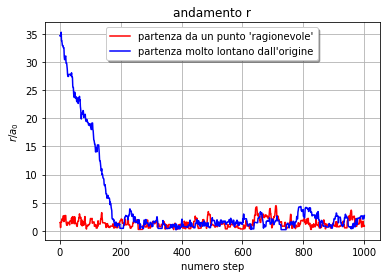

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

r=np.loadtxt("andamento.dat", usecols=(0), delimiter=' ', unpack='true')
rfar=np.loadtxt("andamento_far.dat", usecols=(0), delimiter=' ', unpack='true')
i=np.arange(len(r))
i=i+1
plt.title('andamento r')
plt.xlabel('numero step')
plt.ylabel('$r$/$a_0$')

plt.plot(i,r,color="red",label="partenza da un punto \'ragionevole\'")
plt.plot(i,rfar,color="blue",label="partenza molto lontano dall'origine")
plt.grid(True)
legend = plt.legend(loc='upper center',shadow=True)
plt.show()

Si osserva che, in circa 200 step, anche la simulazione partita molto lontano dall'origine risulta equilibrata. La convergenza è quindi molto rapida. Si può mostrare che per lo stato 2p l'andamento è molto simile.

Di conseguenza, utilizzando tutti i $10^8$ passi Monte Carlo, è lecito attendersi, con i due diversi punti di partenza, dei risultati pressoché identici (entro le loro incertezze). I 200 step iniziali di equilibrazione sono, infatti, una frazione insignificante di $M$ (e anche di $L=10^6$).

Se, al contrario, la convergenza fosse stata estremamente lenta (o se si fosse scelto un $M$ molto più piccolo) sarebbe stato necessario, nella prima fase della della simulazione, far evolvere il sistema senza raccogliere alcun dato. Una volta raggiunto l'equilibrio, si sarebbe potuto iniziare a valutare $r$.

Nei grafici successivi sono riportati i valori di $\left\langle r \right\rangle$ all'aumentare del numero di step. Come al solito, quindi, si utilizza inizialmente solo il primo blocco, poi i primi due e così via fino a considerarli tutti e cento. Il numero di passi è allora pari a $L\times N_c$, mentre $\left\langle r \right\rangle$ è dato dalla media aritmetica della stima dei vari blocchi. Le incertezze sono state calcolate mediante la solita formula della deviazione standard nella media. 

In rosso sono riportati anche i valori analitici di $\left\langle r \right\rangle$. Infatti, si può dimostrare che, per un atomo di idrogeno, $$\left\langle r \right\rangle_{nlm_l}=\frac{a_0}{2}[3n^2-l(l+1)]$$

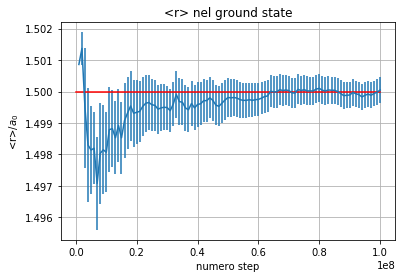

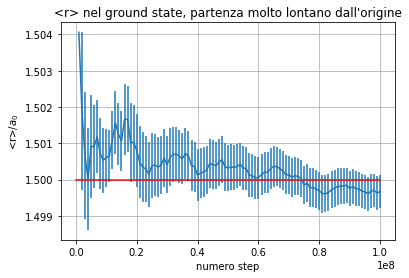

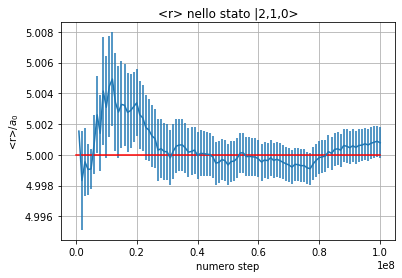

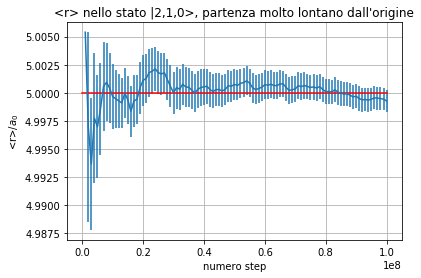

In [12]:
i, r, err = np.loadtxt("media_100.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nel ground state')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)

N = 100
x = np.linspace(0.,100000000.,N,endpoint=True)
y=np.zeros(N)
y=y+3./2.
plt.plot(x,y,color="red") 
plt.show()

i, r, err = np.loadtxt("media_100_far.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nel ground state, partenza molto lontano dall\'origine')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)
plt.plot(x,y,color="red") 
plt.show()

i, r, err = np.loadtxt("media_210.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nello stato |2,1,0>')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)

y+=7./2.
plt.plot(x,y,color="red") 
plt.show()

i, r, err = np.loadtxt("media_210_far.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nello stato |2,1,0>, partenza molto lontano dall\'origine')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)
plt.plot(x,y,color="red") 
plt.show()

I quattro risultati finali ottenuti con tutti i cento blocchi sono compatibili, entro le loro incertezze, con quanto previsto dal calcolo analitico. Inoltre, anche considerando un numero limitato di blocchi, si osserva qualitativamente che i dati non si discostano mai dal valore teorico di oltre $2\sigma$.

Come previsto, i risultati finali, derivanti dalle due diverse scelte del punto di partenza, sono tra loro compatibili, sia per il ground state che per lo stato 2p. Come già spiegato, ciò è intuibile data l'estrema velocità di convergenza rispetto al numero totale di passi Monte Carlo effettuati.

Si decide di ripetere l'esperimento cambiando forma alla $T$. Anziché considerare una distribuzione uniforme, si utilizza ora una gaussiana centrata nel punto di partenza. La deviazione standard $\sigma$ è stata scelta, a seguito di numerosi tentativi, in modo tale da soddisfare la regola del $50\%$. Per il ground state $\sigma=0,75a_0$, mentre per il 2p $\sigma=1,9a_0$. 

Non è stato modificato il numero totale $M$ di passi Monte Carlo, né il numero di blocchi $L$. Come punti iniziali si sono scelti quelli "ragionevoli" già utilizzati nella prima parte dell'esperienza. L'unica sostanziale differenza risiede, ovviamente, nella diversa $T$ con cui vengono estratte le nuove coordinate a partire da quelle vecchie. Questi sono stati i risultati ottenuti:

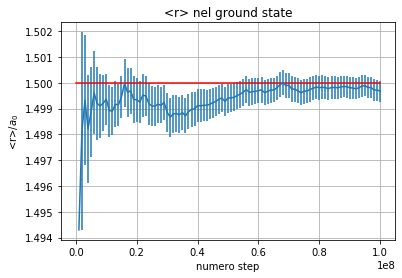

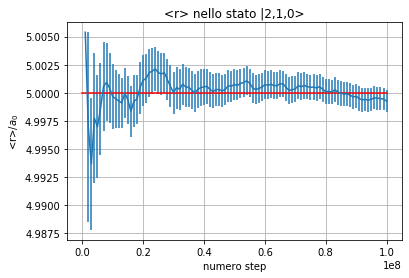

In [14]:
i, r, err = np.loadtxt("media_100_gauss.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nel ground state')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)
y=y-7./2.
plt.plot(x,y,color="red") 
plt.show()
           
i, r, err = np.loadtxt("media_210_far.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,r,yerr=err)
plt.title ('<r> nello stato |2,1,0>')
plt.xlabel('numero step')
plt.ylabel('<r>/$a_0$')
plt.grid(True)
y=y+7./2.           
plt.plot(x,y,color="red") 
plt.show()           

Anche in questo caso valgono considerazioni del tutto analoghe alle precedenti: dopo le oscillazioni iniziali i dati sono compatibili, entro le loro incertezze, con il valore tabulato.

Si è dunque mostrato che i risultati non dipendono dalla scelta della distribuzione $T$, è sufficiente sceglierne una simmetrica che si sappia campionare con tecniche elementari, in modo da poter estrarre facilmente le nuove coordinate.

## <span style="color:blue">ESERCIZIO AGGIUNTIVO</span>

Sfruttando le potenzialità di python, si può provare a generalizzare il precedente esercizio al fine di calcolare il valor medio di $r$ in un qualunque autostato dell'atomo di idrogeno. La funzione d'onda $\Psi_{n,l,m_l}(r,\theta,\phi)$ può essere ricavata con la <a href="https://wikimedia.org/api/rest_v1/media/math/render/svg/6ec5ef09508136b6a693406660ac7e172fd4d6c0"> seguente equazione ricorsiva </a>  che coinvolge i polinomi generalizzati di Laguerre e le funzioni associate di Legendre.

Con sympy si possono differenziare le funzioni, di conseguenza il calcolo della $\Psi$ viene effettuato direttamente dalla macchina. Tramite la stessa libreria è anche possibile sostituire delle variabili, quindi è immediato passare dalle coordinate sferiche a quelle cartesiane.

Nella cartella "r" si possono notare diversi programmi, alcuni scritti in c++, altri in python. Quello fondamentale è "r.cxx": eseguendo "r.exe" vengono lanciati tutti gli tutti gli altri attraverso la funzione "system". "r.py" chiede all'utente di inserire i numeri quantici dell'autostato che si intende studiare, calcola la funzione d'onda in coordinate cartesiane e la salva in "funzione.cxx". A questo punto viene compilato ed eseguito "main.cxx" che, tramite l'algoritmo di Metropolis e le varie medie a blocchi, determina $\left\langle r \right\rangle$ all'aumentare del numero dei passi Monte Carlo. Infine, "disegna.py" crea un grafico analogo a quelli mostrati in precedenza. Inizialmente si era tentato di risolvere l'intero esercizio con un unico codice in python, tuttavia è stato facile rendersi conto che questa strada era impraticabile. Il programma era, infatti, dolorosamente lento nell'esecuzione dell'algoritmo di Metropolis (ci sarebbero volute diverse ore per $10^6$ step Monte Carlo nel semplice stato 1s).

Questo programma non ha certamente la pretesa di essere perfetto. Si è infatti scelto, per ogni stato, il punto di partenza $(1;1;1)$; si è posto $d=2$ e si sono effettuati mille step di equilibrazione. Come si può immaginare, quindi, l'accettazione dell'algoritmo di Metropolis non sarà quasi mai del $50\%$ e, per stati con $n$ molto elevato, potrebbero essere necessari più di mille passi prima di procedere con le stime di $r$. 

In ogni caso, si osserva che, per $n\le7$, gli andamenti di $\left\langle r \right\rangle$ sono compatibili con i valori attesi. Vengono qui riportati i risultati ottenuti per lo stato $|n=3; l=1; m_l=1>$. Si sono utilizzati $M=10^7$ passi Monte Carlo suddivisi in $N=100$ blocchi.
<img src="r/fig.png">
